In [1]:
import numpy as np
import json

def openLists(route):
    val = {}
    with open(f'{route}') as file:
        for line in file:
            data = json.loads(line)
            key, values = data
            val[key] = np.array(values)
        return val
    

archivo = openLists('listas-posteo-100.json')

In [2]:
import random
import itertools
listas = list(archivo.values())
# Generamos todas las posibles combinaciones de 3 listas
def generar_combinaciones(listas, n):
    return itertools.combinations(listas, n)

# Seleccionamos aleatoriamente 1000 combinaciones
combinaciones = generar_combinaciones(listas, 2)
A = random.sample(list(combinaciones), 1000)
combinaciones = generar_combinaciones(listas, 3)
B = random.sample(list(combinaciones), 1000)
combinaciones = generar_combinaciones(listas, 4)
C = random.sample(list(combinaciones), 1000)

#print(B)  # Imprime las 1000 combinaciones seleccionadas

In [3]:
def binary_search(arr, x):
  low = 0
  high = len(arr) - 1

  while low <= high:
    mid = (low + high) // 2
    if arr[mid] == x:
      return mid
    elif arr[mid] < x:
      low = mid + 1
    else:
      high = mid - 1

  return -1

In [4]:
def galloping_search(arr, x):
    # Verificar si la lista está vacía
    if not arr:
        return -1

    # Paso 1: Encontrar el rango donde x podría estar
    if arr[0] == x:
        return 0
    i = 1
    while i < len(arr) and arr[i] < x:
        i = i * 2

    # Paso 2: Realizar una búsqueda binaria en el rango encontrado
    low = i // 2
    high = min(i, len(arr) - 1)
    index = binary_search(arr[low:high+1], x)
    
    # Ajustar el índice si se encontró el elemento
    if index != -1:
        return low + index
    return -1

# Ejemplo de uso
arr = [1, 3, 7, 15, 31, 63, 127, 255, 511, 1023]
x = 63
index = galloping_search(arr, x)
print(f"Elemento {x} encontrado en el índice {index}")

Elemento 63 encontrado en el índice 5


In [5]:
import time

def SvS(sets, k, fbusq):
  start_time = time.process_time()
  comparisons = 0

  # 1. Ordenar los conjuntos por tamaño
  sets.sort(key=len)

  # 2. El conjunto más pequeño es el candidato inicial
  candidate_set = sets[0].copy()

  # 3. Inicializar índices
  indices = [0] * k

  # 4. Iterar sobre los conjuntos
  for i, S in enumerate(sets):
    for e in list(candidate_set):
      # 6. Búsqueda binaria redondeada
      index = fbusq(S[indices[i]:], e)
      comparisons += 1
      if index != -1:
        indices[i] += index + 1
      else:
        # 8-10. Eliminar e del conjunto candidato
        candidate_set.remove(e)
  end_time = time.process_time()
  elapsed_time = end_time - start_time


  return candidate_set, comparisons, elapsed_time

# Ejemplo de uso:
sets = [[1, 2, 3, 4], [3, 4, 9, 10], [3, 4, 5, 6, 7], [3, 4, 11, 12]]
k = len(sets)
result, comparaciones, tiempo = SvS(sets, k, galloping_search)
print(result)  # Output: {3, 4}
print(comparaciones)
print(tiempo)

[3, 4]
12
4.500000000007276e-05


In [6]:
def SmallAdaptive(sets, k, fbusq):
  start_time = time.process_time()
  comparisons = 0
  answer = []

  # Mientras haya algún conjunto no vacío
  while any(sets):
    # 2. Ordenar los conjuntos por tamaño creciente
    sets.sort(key=len)
    # 3. Seleccionar el primer elemento del conjunto más pequeño como eliminador
    if sets[0]:
        eliminator = sets[0].pop(0)
    else:
        # Si el conjunto está vacío, pasamos al siguiente conjunto
        break

    # 4. Inicializar el índice del conjunto a 1
    elimset = 1

    # 5. Iterar mientras no se hayan revisado todos los conjuntos o se encuentre el eliminador k veces
    while elimset < k and eliminator in sets[elimset]:
      # 6. Búsqueda binaria adaptada para encontrar el eliminador en el conjunto actual
      index = fbusq(sets[elimset], eliminator)
      comparisons += 1
      if index != -1:
        # Eliminar el elemento encontrado y desplazar los elementos restantes
        sets[elimset].pop(index)
      elimset += 1

    # 9. Si se encontró el eliminador en k conjuntos, agregarlo al conjunto de respuestas
    if elimset == k:
      answer.append(eliminator)

  end_time = time.process_time()
  elapsed_time = end_time - start_time

  return answer, comparisons, elapsed_time


sets = [[1, 2, 3, 4], [3, 4, 9, 10], [3, 4, 5, 6, 7], [3, 4, 11, 12]]
k = len(sets)
result, comparaciones, tiempo = SmallAdaptive(sets, k, binary_search)
print(result)  # Output: {3, 4}
print(comparaciones)
print(tiempo)

[3, 4]
6
3.499999999956316e-05


In [7]:
def Sequential(sets, k, fbusq):
    # Ordenar los conjuntos por tamaño para empezar con el más pequeño
    sets.sort(key=len)
    
    # Inicializar la lista de elementos comunes
    common_elements = []
    comparisons = 0
    
    start_time = time.process_time()
    # Iterar sobre cada elemento del conjunto más pequeño
    for e in sets[0]:
        occurrence_counter = 1  # Contar la ocurrencia en el primer conjunto

        # Verificar si el elemento está presente en todos los demás conjuntos
        for i in range(1, k):
            index = fbusq(sets[i], e)
            comparisons += 1
            if index != -1:
                occurrence_counter += 1
            else:
                break

        # Si el elemento está presente en todos los conjuntos, agregarlo a la lista
        if occurrence_counter == k:
            common_elements.append(e)
    end_time = time.process_time()
    elapsed_time = end_time - start_time
    
    # Devolver la lista de elementos comunes
    return common_elements, comparisons, elapsed_time

# Ejemplo de uso:
sets = [[1, 2, 3, 4, 5, 6], [3, 4, 5,6, 9, 10], [3, 4, 5, 6, 7], [3, 4, 5, 6, 11, 12]]
k = len(sets)
result = Sequential(sets, k, binary_search)
print(result)  # Output: [3, 4, 5]

([3, 4, 5, 6], 13, 3.1000000000336314e-05)


In [8]:
def BYintersect(setA, setB, minA, maxA, minB, maxB, fbusq, metrics):
    if minA > maxA or minB > maxB:
        return []

    m = (minA + maxA) // 2
    median = setA[m]
    index_in_B = fbusq(setB, median)
    metrics['comparisons'] += 1  # Incrementar el conteo de comparaciones

    result = []
    if index_in_B != -1:
        result.append(median)

    r = index_in_B if index_in_B != -1 else (minB + maxB) // 2

    result += BYintersect(setA, setB, minA, m - 1, minB, r - 1, fbusq, metrics)
    result += BYintersect(setA, setB, m + 1, maxA, r + 1, maxB, fbusq, metrics)

    return result

def BaezaYates(sets, k, fbusq):
    metrics = {'comparisons': 0}
    start_time = time.time()
    sets.sort(key=len)
    candidate = sets[0]

    for i in range(1, k):
        candidate = BYintersect(candidate, sets[i], 0, len(candidate) - 1, 0, len(sets[i]) - 1, fbusq, metrics)
        candidate.sort()

    end_time = time.time()
    elapsed_time = end_time - start_time
    return candidate, metrics['comparisons'], elapsed_time

# Ejemplo de uso
sets = [
    [1, 2, 3, 4, 5],
    [3, 4, 5, 6, 7],
    [5, 6, 7, 8, 9]
]
k = 3

result, comparisons, elapsed_time = BaezaYates(sets, k, binary_search)
print("Resultado:", result)
print("Comparaciones:", comparisons)
print("Tiempo:", elapsed_time)

Resultado: [5]
Comparaciones: 6
Tiempo: 2.47955322265625e-05


In [9]:
def starter(listas, busqueda, interseccion, combs):
    flist = []
    ftime = []
    fcomp = []
    for element in listas:
        if combs == 2:
            lista1 = element[0].tolist()
            lista2 = element[1].tolist()
            listafinal = [lista1, lista2,]
        if combs == 3:
            lista1 = element[0].tolist()
            lista2 = element[1].tolist()
            lista3 = element[2].tolist()
            listafinal = [lista1, lista2, lista3]
        if combs == 4:
            lista1 = element[0].tolist()
            lista2 = element[1].tolist()
            lista3 = element[2].tolist()
            lista4 = element[3].tolist()
            listafinal = [lista1, lista2, lista3, lista4]
        k = len(listafinal)
        result, comparaciones, tiempo = interseccion(listafinal, k, busqueda)
        flist.append(result)
        flist = [sublist for sublist in flist if sublist] #Eliminamos las listas vacías
        ftime.append(tiempo)
        fcomp.append(comparaciones)
    return flist, ftime, fcomp


In [10]:
lista_svsb_A, comparaciones_svsb_A, tiempo_svsb_A= starter(A, binary_search, SvS, 2)
lista_svsg_A, comparaciones_svsg_A, tiempo_svsg_A = starter(A, galloping_search, SvS, 2)

lista_svsb_B, comparaciones_svsb_B, tiempo_svsb_B = starter(B, binary_search, SvS, 3)
lista_svsg_B, comparaciones_svsg_B, tiempo_svsg_B = starter(B, galloping_search, SvS, 3)

lista_svsb_C, comparaciones_svsb_C, tiempo_svsb_C = starter(C, binary_search, SvS, 4)
lista_svsg_C, comparaciones_svsg_C, tiempo_svsg_C = starter(C, galloping_search, SvS, 4)

In [11]:
lista_sab_A, comparaciones_sab_A, tiempo_sab_A= starter(A, binary_search, SmallAdaptive, 2)
lista_sag_A, comparaciones_sag_A, tiempo_sag_A = starter(A, galloping_search, SmallAdaptive, 2)

lista_sab_B, comparaciones_sab_B, tiempo_sab_B = starter(B, binary_search, SmallAdaptive, 3)
lista_sag_B, comparaciones_sag_B, tiempo_sag_B = starter(B, galloping_search, SmallAdaptive, 3)

lista_sab_C, comparaciones_sab_C, tiempo_sab_C = starter(C, binary_search, SmallAdaptive, 4)
lista_sag_C, comparaciones_sag_C, tiempo_sag_C = starter(C, galloping_search, SmallAdaptive, 4)

In [12]:
lista_seqb_A, comparaciones_seqb_A, tiempo_seqb_A, = starter(A, binary_search, Sequential, 2)
lista_seqg_A, comparaciones_seqg_A, tiempo_seqg_A = starter(A, galloping_search, Sequential, 2)

lista_seqb_B, comparaciones_seqb_B, tiempo_seqb_B = starter(B, binary_search, Sequential, 3)
lista_seqg_B, comparaciones_seqg_B, tiempo_seqg_B = starter(B, galloping_search, Sequential, 3)

lista_seqb_C, comparaciones_seqb_C, tiempo_seqb_C = starter(C, binary_search, Sequential, 4)
lista_seqg_C, comparaciones_seqg_C, tiempo_seqg_C = starter(C, galloping_search, Sequential, 4)

In [13]:
lista_bayb_A, comparaciones_bayb_A, tiempo_bayb_A, = starter(A, binary_search, BaezaYates, 2)
lista_bayg_A, comparaciones_bayg_A, tiempo_bayg_A = starter(A, galloping_search, BaezaYates, 2)

lista_bayb_B, comparaciones_bayb_B, tiempo_bayb_B = starter(B, binary_search, BaezaYates, 3)
lista_bayg_B, comparaciones_bayg_B, tiempo_bayg_B = starter(B, galloping_search, BaezaYates, 3)

lista_bayb_C, comparaciones_bayb_C, tiempo_bayb_C = starter(C, binary_search, BaezaYates, 4)
lista_bayg_C, comparaciones_bayg_C, tiempo_bayg_C = starter(C, galloping_search, BaezaYates, 4)

In [15]:
# Función para convertir listas en listas de longitudes
def convertir_a_longitudes(lista):
    return [len(sublista) for sublista in lista]

# Convertir las listas
longitudes_svsb_A = convertir_a_longitudes(lista_svsb_A)
longitudes_svsg_A = convertir_a_longitudes(lista_svsg_A)
longitudes_svsb_B = convertir_a_longitudes(lista_svsb_B)
longitudes_svsg_B = convertir_a_longitudes(lista_svsg_B)
longitudes_svsb_C = convertir_a_longitudes(lista_svsb_C)
longitudes_svsg_C = convertir_a_longitudes(lista_svsg_C)

longitudes_sab_A = convertir_a_longitudes(lista_sab_A)
longitudes_sag_A = convertir_a_longitudes(lista_sag_A)
longitudes_sab_B = convertir_a_longitudes(lista_sab_B)
longitudes_sag_B = convertir_a_longitudes(lista_sag_B)
longitudes_sab_C = convertir_a_longitudes(lista_sab_C)
longitudes_sag_C = convertir_a_longitudes(lista_sag_C)

longitudes_seqb_A = convertir_a_longitudes(lista_seqb_A)
longitudes_seqg_A = convertir_a_longitudes(lista_seqg_A)
longitudes_seqb_B = convertir_a_longitudes(lista_seqb_B)
longitudes_seqg_B = convertir_a_longitudes(lista_seqg_B)
longitudes_seqb_C = convertir_a_longitudes(lista_seqb_C)
longitudes_seqg_C = convertir_a_longitudes(lista_seqg_C)

longitudes_bayb_A = convertir_a_longitudes(lista_bayb_A)
longitudes_bayg_A = convertir_a_longitudes(lista_bayg_A)
longitudes_bayb_B = convertir_a_longitudes(lista_bayb_B)
longitudes_bayg_B = convertir_a_longitudes(lista_bayg_B)
longitudes_bayb_C = convertir_a_longitudes(lista_bayb_C)
longitudes_bayg_C = convertir_a_longitudes(lista_bayg_C)

/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/2882939658.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 0].boxplot(longitudes_svs, vert=False, patch_artist=True, labels=labels_svs, showfliers=False)
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/2882939658.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 1].boxplot(longitudes_small_adaptive, vert=False, patch_artist=True, labels=labels_small_adaptive, showfliers=False)
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/2882939658.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1, 0].boxpl

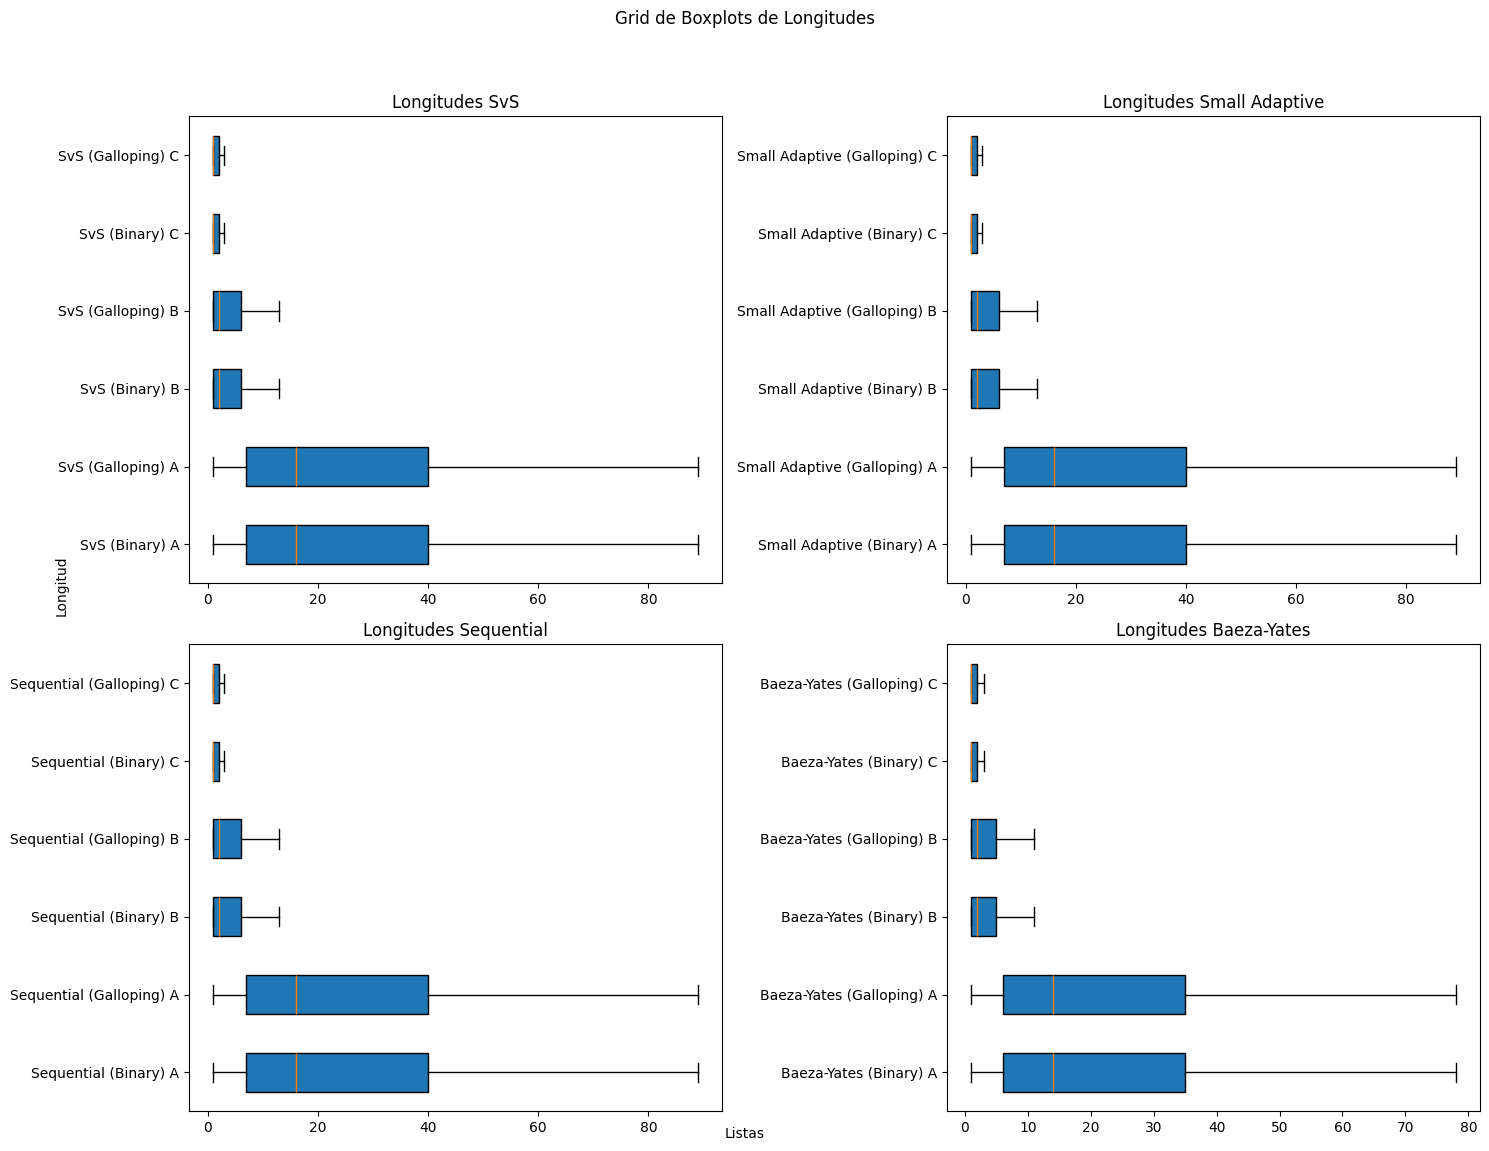

In [16]:
import matplotlib.pyplot as plt

# Datos
longitudes_svs = [longitudes_svsb_A, longitudes_svsg_A, longitudes_svsb_B, longitudes_svsg_B, longitudes_svsb_C, longitudes_svsg_C]
longitudes_small_adaptive = [longitudes_sab_A, longitudes_sag_A, longitudes_sab_B, longitudes_sag_B, longitudes_sab_C, longitudes_sag_C]
longitudes_sequential = [longitudes_seqb_A, longitudes_seqg_A, longitudes_seqb_B, longitudes_seqg_B, longitudes_seqb_C, longitudes_seqg_C]
longitudes_baezayates = [longitudes_bayb_A, longitudes_bayg_A, longitudes_bayb_B, longitudes_bayg_B, longitudes_bayb_C, longitudes_bayg_C]

# Etiquetas para cada conjunto de datos
labels_svs = ['SvS (Binary) A', 'SvS (Galloping) A', 'SvS (Binary) B', 'SvS (Galloping) B', 'SvS (Binary) C', 'SvS (Galloping) C']
labels_small_adaptive = ['Small Adaptive (Binary) A', 'Small Adaptive (Galloping) A', 'Small Adaptive (Binary) B', 'Small Adaptive (Galloping) B', 'Small Adaptive (Binary) C', 'Small Adaptive (Galloping) C']
labels_sequential = ['Sequential (Binary) A', 'Sequential (Galloping) A', 'Sequential (Binary) B', 'Sequential (Galloping) B', 'Sequential (Binary) C', 'Sequential (Galloping) C']
labels_baezayates = ['Baeza-Yates (Binary) A', 'Baeza-Yates (Galloping) A', 'Baeza-Yates (Binary) B', 'Baeza-Yates (Galloping) B', 'Baeza-Yates (Binary) C', 'Baeza-Yates (Galloping) C']

# Crear el grid de subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Añadir boxplots a cada subplot
axs[0, 0].boxplot(longitudes_svs, vert=False, patch_artist=True, labels=labels_svs, showfliers=False)
axs[0, 0].set_title('Longitudes SvS')

axs[0, 1].boxplot(longitudes_small_adaptive, vert=False, patch_artist=True, labels=labels_small_adaptive, showfliers=False)
axs[0, 1].set_title('Longitudes Small Adaptive')

axs[1, 0].boxplot(longitudes_sequential, vert=False, patch_artist=True, labels=labels_sequential, showfliers=False)
axs[1, 0].set_title('Longitudes Sequential')

axs[1, 1].boxplot(longitudes_baezayates, vert=False, patch_artist=True, labels=labels_baezayates, showfliers=False)
axs[1, 1].set_title('Longitudes Baeza-Yates')

# Añadir etiquetas comunes
fig.suptitle('Grid de Boxplots de Longitudes')
fig.text(0.5, 0.04, 'Listas', ha='center')
fig.text(0.04, 0.5, 'Longitud', va='center', rotation='vertical')

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar el gráfico
plt.show()

/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/967828667.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 0].boxplot(longitudes_svs, vert=False, patch_artist=True, labels=labels_svs, showfliers=True)
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/967828667.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 1].boxplot(longitudes_small_adaptive, vert=False, patch_artist=True, labels=labels_small_adaptive, showfliers=True)
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/967828667.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1, 0].boxplot(lo

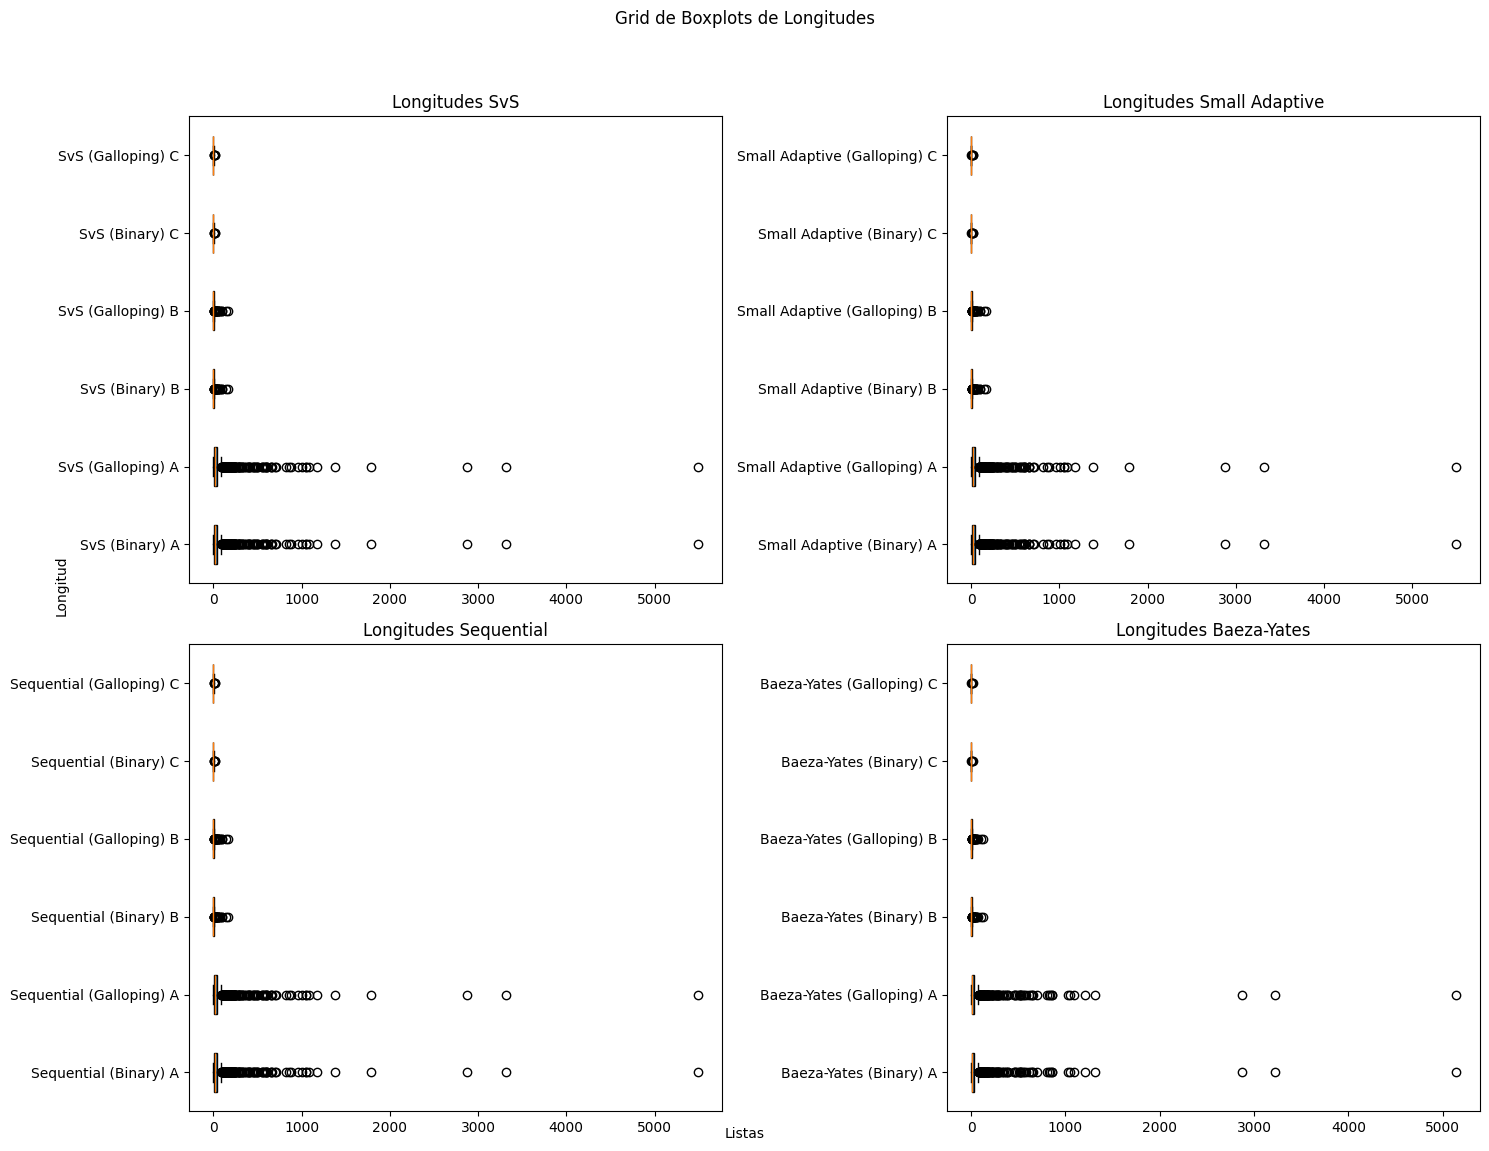

In [17]:
# Datos
longitudes_svs = [longitudes_svsb_A, longitudes_svsg_A, longitudes_svsb_B, longitudes_svsg_B, longitudes_svsb_C, longitudes_svsg_C]
longitudes_small_adaptive = [longitudes_sab_A, longitudes_sag_A, longitudes_sab_B, longitudes_sag_B, longitudes_sab_C, longitudes_sag_C]
longitudes_sequential = [longitudes_seqb_A, longitudes_seqg_A, longitudes_seqb_B, longitudes_seqg_B, longitudes_seqb_C, longitudes_seqg_C]
longitudes_baezayates = [longitudes_bayb_A, longitudes_bayg_A, longitudes_bayb_B, longitudes_bayg_B, longitudes_bayb_C, longitudes_bayg_C]

# Etiquetas para cada conjunto de datos
labels_svs = ['SvS (Binary) A', 'SvS (Galloping) A', 'SvS (Binary) B', 'SvS (Galloping) B', 'SvS (Binary) C', 'SvS (Galloping) C']
labels_small_adaptive = ['Small Adaptive (Binary) A', 'Small Adaptive (Galloping) A', 'Small Adaptive (Binary) B', 'Small Adaptive (Galloping) B', 'Small Adaptive (Binary) C', 'Small Adaptive (Galloping) C']
labels_sequential = ['Sequential (Binary) A', 'Sequential (Galloping) A', 'Sequential (Binary) B', 'Sequential (Galloping) B', 'Sequential (Binary) C', 'Sequential (Galloping) C']
labels_baezayates = ['Baeza-Yates (Binary) A', 'Baeza-Yates (Galloping) A', 'Baeza-Yates (Binary) B', 'Baeza-Yates (Galloping) B', 'Baeza-Yates (Binary) C', 'Baeza-Yates (Galloping) C']

# Crear el grid de subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Añadir boxplots a cada subplot
axs[0, 0].boxplot(longitudes_svs, vert=False, patch_artist=True, labels=labels_svs, showfliers=True)
axs[0, 0].set_title('Longitudes SvS')

axs[0, 1].boxplot(longitudes_small_adaptive, vert=False, patch_artist=True, labels=labels_small_adaptive, showfliers=True)
axs[0, 1].set_title('Longitudes Small Adaptive')

axs[1, 0].boxplot(longitudes_sequential, vert=False, patch_artist=True, labels=labels_sequential, showfliers=True)
axs[1, 0].set_title('Longitudes Sequential')

axs[1, 1].boxplot(longitudes_baezayates, vert=False, patch_artist=True, labels=labels_baezayates, showfliers=True)
axs[1, 1].set_title('Longitudes Baeza-Yates')

# Añadir etiquetas comunes
fig.suptitle('Grid de Boxplots de Longitudes')
fig.text(0.5, 0.04, 'Listas', ha='center')
fig.text(0.04, 0.5, 'Longitud', va='center', rotation='vertical')

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar el gráfico
plt.show()

/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/968422711.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 0].boxplot(tiempos_svs, vert=False, patch_artist=True, labels=labels_svs, showfliers=False)
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/968422711.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 1].boxplot(tiempos_small_adaptive, vert=False, patch_artist=True, labels=labels_small_adaptive, showfliers=False)
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/968422711.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1, 0].boxplot(tiempo

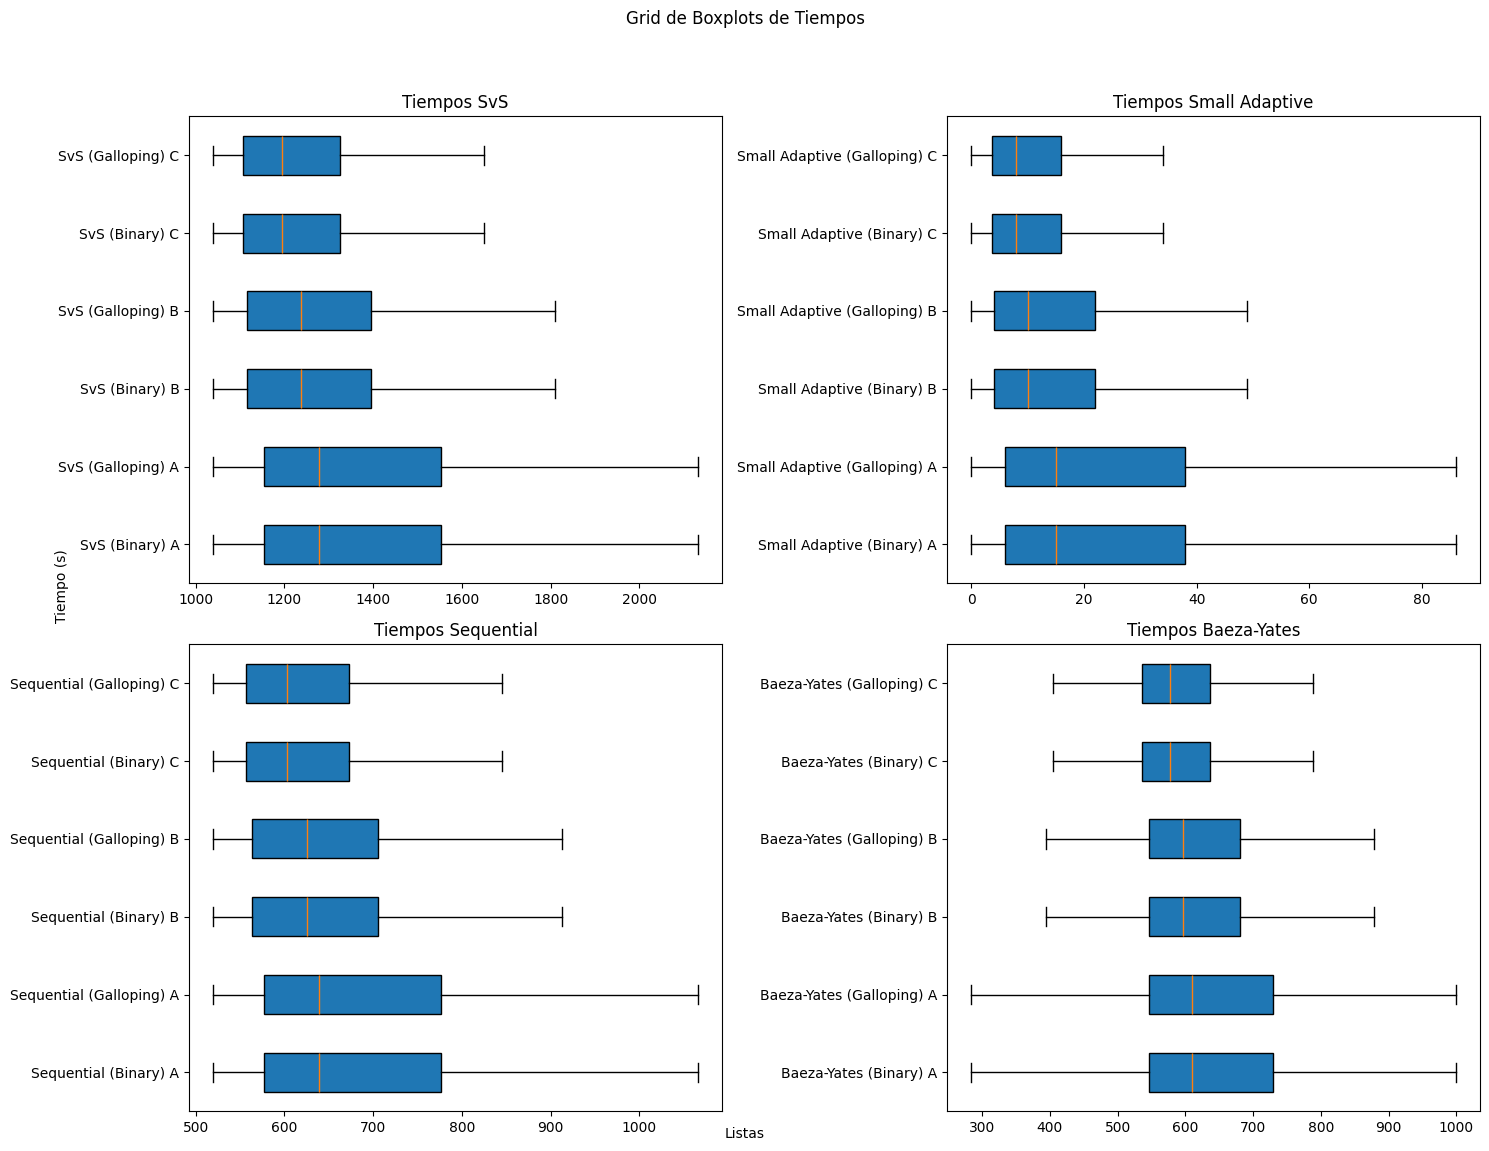

In [18]:
# Datos de tiempos
tiempos_svs = [tiempo_svsb_A, tiempo_svsg_A, tiempo_svsb_B, tiempo_svsg_B, tiempo_svsb_C, tiempo_svsg_C]
tiempos_small_adaptive = [tiempo_sab_A, tiempo_sag_A, tiempo_sab_B, tiempo_sag_B, tiempo_sab_C, tiempo_sag_C]
tiempos_sequential = [tiempo_seqb_A, tiempo_seqg_A, tiempo_seqb_B, tiempo_seqg_B, tiempo_seqb_C, tiempo_seqg_C]
tiempos_baezayates = [tiempo_bayb_A, tiempo_bayg_A, tiempo_bayb_B, tiempo_bayg_B, tiempo_bayb_C, tiempo_bayg_C]

# Etiquetas para cada conjunto de datos
labels_svs = ['SvS (Binary) A', 'SvS (Galloping) A', 'SvS (Binary) B', 'SvS (Galloping) B', 'SvS (Binary) C', 'SvS (Galloping) C']
labels_small_adaptive = ['Small Adaptive (Binary) A', 'Small Adaptive (Galloping) A', 'Small Adaptive (Binary) B', 'Small Adaptive (Galloping) B', 'Small Adaptive (Binary) C', 'Small Adaptive (Galloping) C']
labels_sequential = ['Sequential (Binary) A', 'Sequential (Galloping) A', 'Sequential (Binary) B', 'Sequential (Galloping) B', 'Sequential (Binary) C', 'Sequential (Galloping) C']
labels_baezayates = ['Baeza-Yates (Binary) A', 'Baeza-Yates (Galloping) A', 'Baeza-Yates (Binary) B', 'Baeza-Yates (Galloping) B', 'Baeza-Yates (Binary) C', 'Baeza-Yates (Galloping) C']

# Crear el grid de subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Añadir boxplots a cada subplot
axs[0, 0].boxplot(tiempos_svs, vert=False, patch_artist=True, labels=labels_svs, showfliers=False)
axs[0, 0].set_title('Tiempos SvS')

axs[0, 1].boxplot(tiempos_small_adaptive, vert=False, patch_artist=True, labels=labels_small_adaptive, showfliers=False)
axs[0, 1].set_title('Tiempos Small Adaptive')

axs[1, 0].boxplot(tiempos_sequential, vert=False, patch_artist=True, labels=labels_sequential, showfliers=False)
axs[1, 0].set_title('Tiempos Sequential')

axs[1, 1].boxplot(tiempos_baezayates, vert=False, patch_artist=True, labels=labels_baezayates, showfliers=False)
axs[1, 1].set_title('Tiempos Baeza-Yates')

# Añadir etiquetas comunes
fig.suptitle('Grid de Boxplots de Tiempos')
fig.text(0.5, 0.04, 'Listas', ha='center')
fig.text(0.04, 0.5, 'Tiempo (s)', va='center', rotation='vertical')

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar el gráfico
plt.show()

/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/1579105477.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 0].boxplot(tiempos_svs, vert=False, patch_artist=True, labels=labels_svs, showfliers=True)
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/1579105477.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 1].boxplot(tiempos_small_adaptive, vert=False, patch_artist=True, labels=labels_small_adaptive, showfliers=True)
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/1579105477.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1, 0].boxplot(tiemp

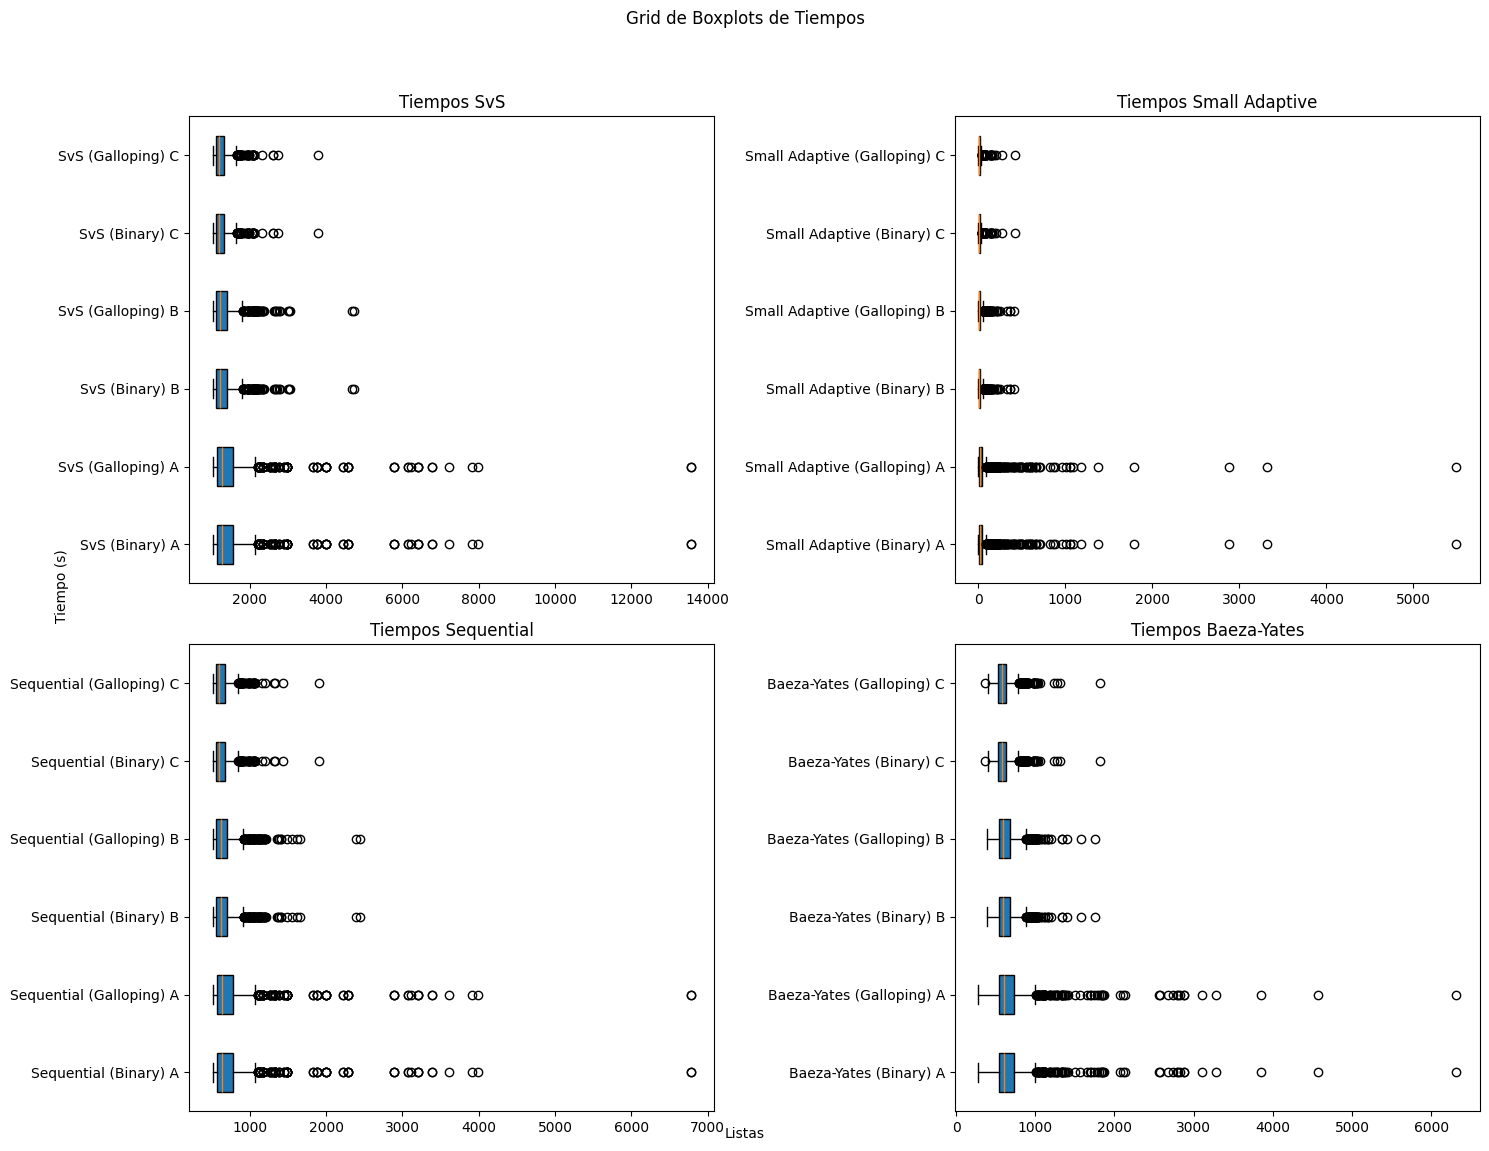

In [19]:
# Datos de tiempos
tiempos_svs = [tiempo_svsb_A, tiempo_svsg_A, tiempo_svsb_B, tiempo_svsg_B, tiempo_svsb_C, tiempo_svsg_C]
tiempos_small_adaptive = [tiempo_sab_A, tiempo_sag_A, tiempo_sab_B, tiempo_sag_B, tiempo_sab_C, tiempo_sag_C]
tiempos_sequential = [tiempo_seqb_A, tiempo_seqg_A, tiempo_seqb_B, tiempo_seqg_B, tiempo_seqb_C, tiempo_seqg_C]
tiempos_baezayates = [tiempo_bayb_A, tiempo_bayg_A, tiempo_bayb_B, tiempo_bayg_B, tiempo_bayb_C, tiempo_bayg_C]

# Etiquetas para cada conjunto de datos
labels_svs = ['SvS (Binary) A', 'SvS (Galloping) A', 'SvS (Binary) B', 'SvS (Galloping) B', 'SvS (Binary) C', 'SvS (Galloping) C']
labels_small_adaptive = ['Small Adaptive (Binary) A', 'Small Adaptive (Galloping) A', 'Small Adaptive (Binary) B', 'Small Adaptive (Galloping) B', 'Small Adaptive (Binary) C', 'Small Adaptive (Galloping) C']
labels_sequential = ['Sequential (Binary) A', 'Sequential (Galloping) A', 'Sequential (Binary) B', 'Sequential (Galloping) B', 'Sequential (Binary) C', 'Sequential (Galloping) C']
labels_baezayates = ['Baeza-Yates (Binary) A', 'Baeza-Yates (Galloping) A', 'Baeza-Yates (Binary) B', 'Baeza-Yates (Galloping) B', 'Baeza-Yates (Binary) C', 'Baeza-Yates (Galloping) C']

# Crear el grid de subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Añadir boxplots a cada subplot
axs[0, 0].boxplot(tiempos_svs, vert=False, patch_artist=True, labels=labels_svs, showfliers=True)
axs[0, 0].set_title('Tiempos SvS')

axs[0, 1].boxplot(tiempos_small_adaptive, vert=False, patch_artist=True, labels=labels_small_adaptive, showfliers=True)
axs[0, 1].set_title('Tiempos Small Adaptive')

axs[1, 0].boxplot(tiempos_sequential, vert=False, patch_artist=True, labels=labels_sequential, showfliers=True)
axs[1, 0].set_title('Tiempos Sequential')

axs[1, 1].boxplot(tiempos_baezayates, vert=False, patch_artist=True, labels=labels_baezayates, showfliers=True)
axs[1, 1].set_title('Tiempos Baeza-Yates')

# Añadir etiquetas comunes
fig.suptitle('Grid de Boxplots de Tiempos')
fig.text(0.5, 0.04, 'Listas', ha='center')
fig.text(0.04, 0.5, 'Tiempo (s)', va='center', rotation='vertical')

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar el gráfico
plt.show()

/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/2671401262.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 0].boxplot(comparaciones_svs, vert=False, patch_artist=True, labels=labels_svs, showfliers=False)
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/2671401262.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 1].boxplot(comparaciones_small_adaptive, vert=False, patch_artist=True, labels=labels_small_adaptive, showfliers=False)
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/2671401262.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1, 0]

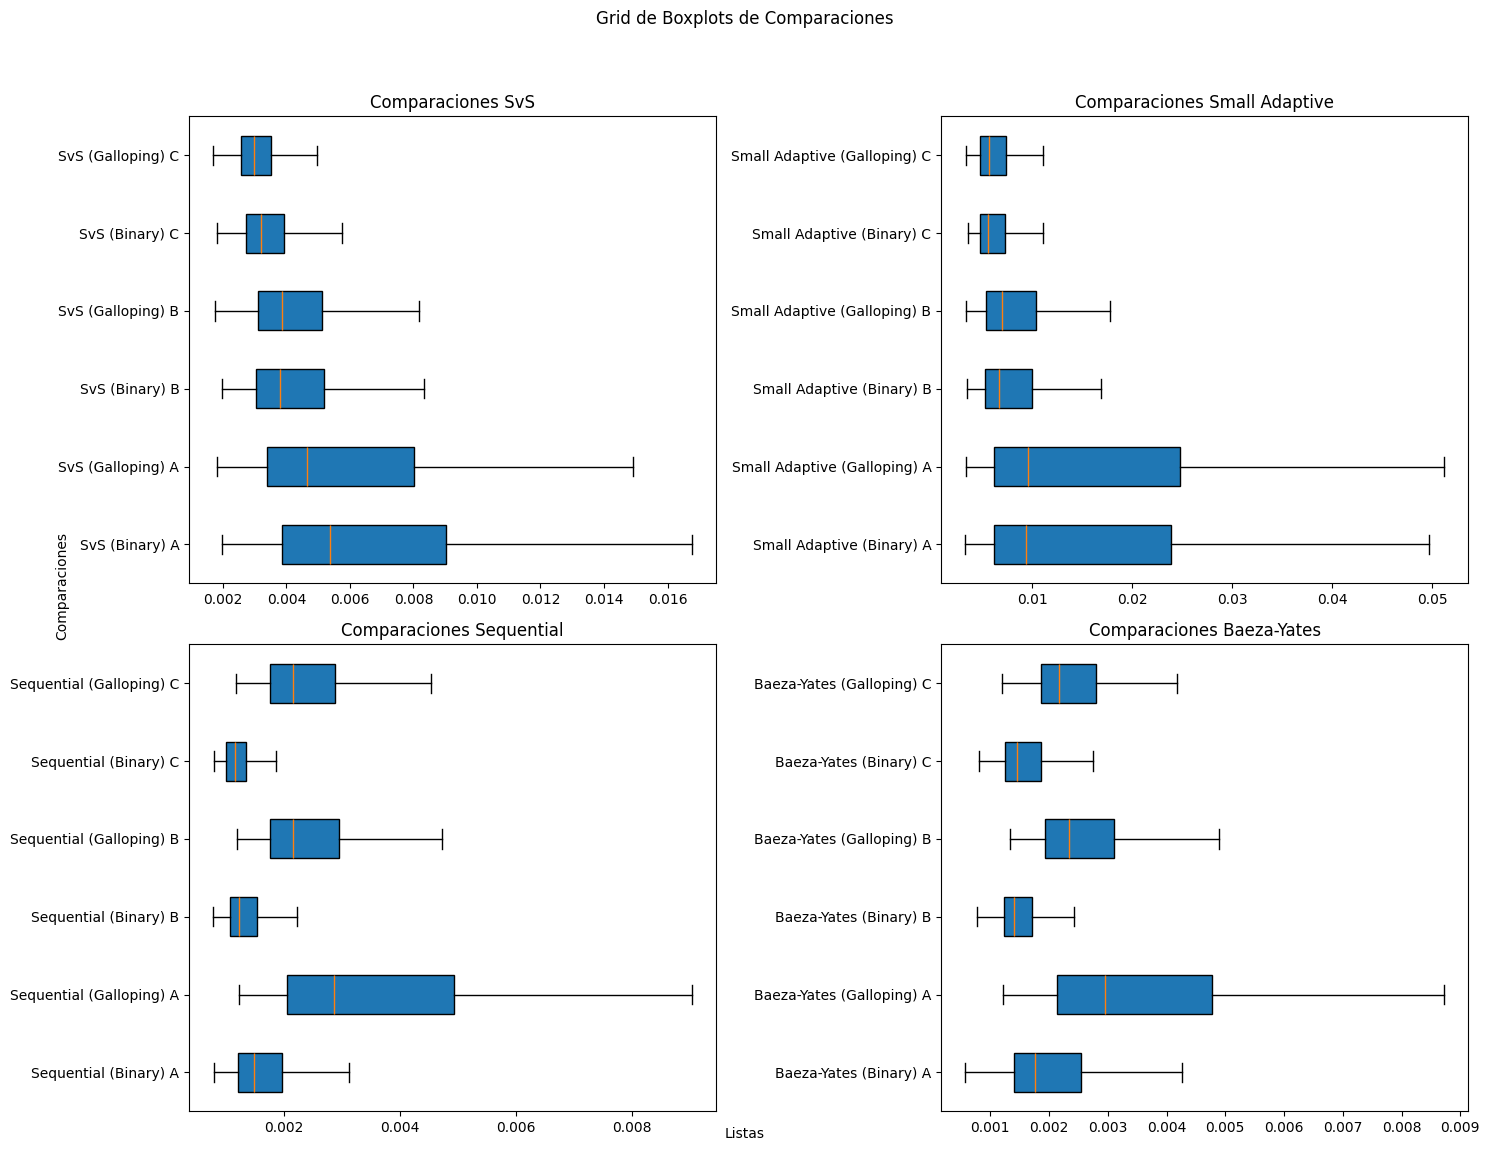

In [20]:
# Datos de comparaciones
comparaciones_svs = [comparaciones_svsb_A, comparaciones_svsg_A, comparaciones_svsb_B, comparaciones_svsg_B, comparaciones_svsb_C, comparaciones_svsg_C]
comparaciones_small_adaptive = [comparaciones_sab_A, comparaciones_sag_A, comparaciones_sab_B, comparaciones_sag_B, comparaciones_sab_C, comparaciones_sag_C]
comparaciones_sequential = [comparaciones_seqb_A, comparaciones_seqg_A, comparaciones_seqb_B, comparaciones_seqg_B, comparaciones_seqb_C, comparaciones_seqg_C]
comparaciones_baezayates = [comparaciones_bayb_A, comparaciones_bayg_A, comparaciones_bayb_B, comparaciones_bayg_B, comparaciones_bayb_C, comparaciones_bayg_C]

# Etiquetas para cada conjunto de datos
labels_svs = ['SvS (Binary) A', 'SvS (Galloping) A', 'SvS (Binary) B', 'SvS (Galloping) B', 'SvS (Binary) C', 'SvS (Galloping) C']
labels_small_adaptive = ['Small Adaptive (Binary) A', 'Small Adaptive (Galloping) A', 'Small Adaptive (Binary) B', 'Small Adaptive (Galloping) B', 'Small Adaptive (Binary) C', 'Small Adaptive (Galloping) C']
labels_sequential = ['Sequential (Binary) A', 'Sequential (Galloping) A', 'Sequential (Binary) B', 'Sequential (Galloping) B', 'Sequential (Binary) C', 'Sequential (Galloping) C']
labels_baezayates = ['Baeza-Yates (Binary) A', 'Baeza-Yates (Galloping) A', 'Baeza-Yates (Binary) B', 'Baeza-Yates (Galloping) B', 'Baeza-Yates (Binary) C', 'Baeza-Yates (Galloping) C']

# Crear el grid de subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Añadir boxplots a cada subplot
axs[0, 0].boxplot(comparaciones_svs, vert=False, patch_artist=True, labels=labels_svs, showfliers=False)
axs[0, 0].set_title('Comparaciones SvS')

axs[0, 1].boxplot(comparaciones_small_adaptive, vert=False, patch_artist=True, labels=labels_small_adaptive, showfliers=False)
axs[0, 1].set_title('Comparaciones Small Adaptive')

axs[1, 0].boxplot(comparaciones_sequential, vert=False, patch_artist=True, labels=labels_sequential, showfliers=False)
axs[1, 0].set_title('Comparaciones Sequential')

axs[1, 1].boxplot(comparaciones_baezayates, vert=False, patch_artist=True, labels=labels_baezayates, showfliers=False)
axs[1, 1].set_title('Comparaciones Baeza-Yates')

# Añadir etiquetas comunes
fig.suptitle('Grid de Boxplots de Comparaciones')
fig.text(0.5, 0.04, 'Listas', ha='center')
fig.text(0.04, 0.5, 'Comparaciones', va='center', rotation='vertical')

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar el gráfico
plt.show()

/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/3313595998.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 0].boxplot(comparaciones_svs, vert=False, patch_artist=True, labels=labels_svs, showfliers=True)
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/3313595998.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0, 1].boxplot(comparaciones_small_adaptive, vert=False, patch_artist=True, labels=labels_small_adaptive, showfliers=True)
/var/folders/v3/6n107fw10yb9ryc5t5mmqw5c0000gp/T/ipykernel_9738/3313595998.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[1, 0].b

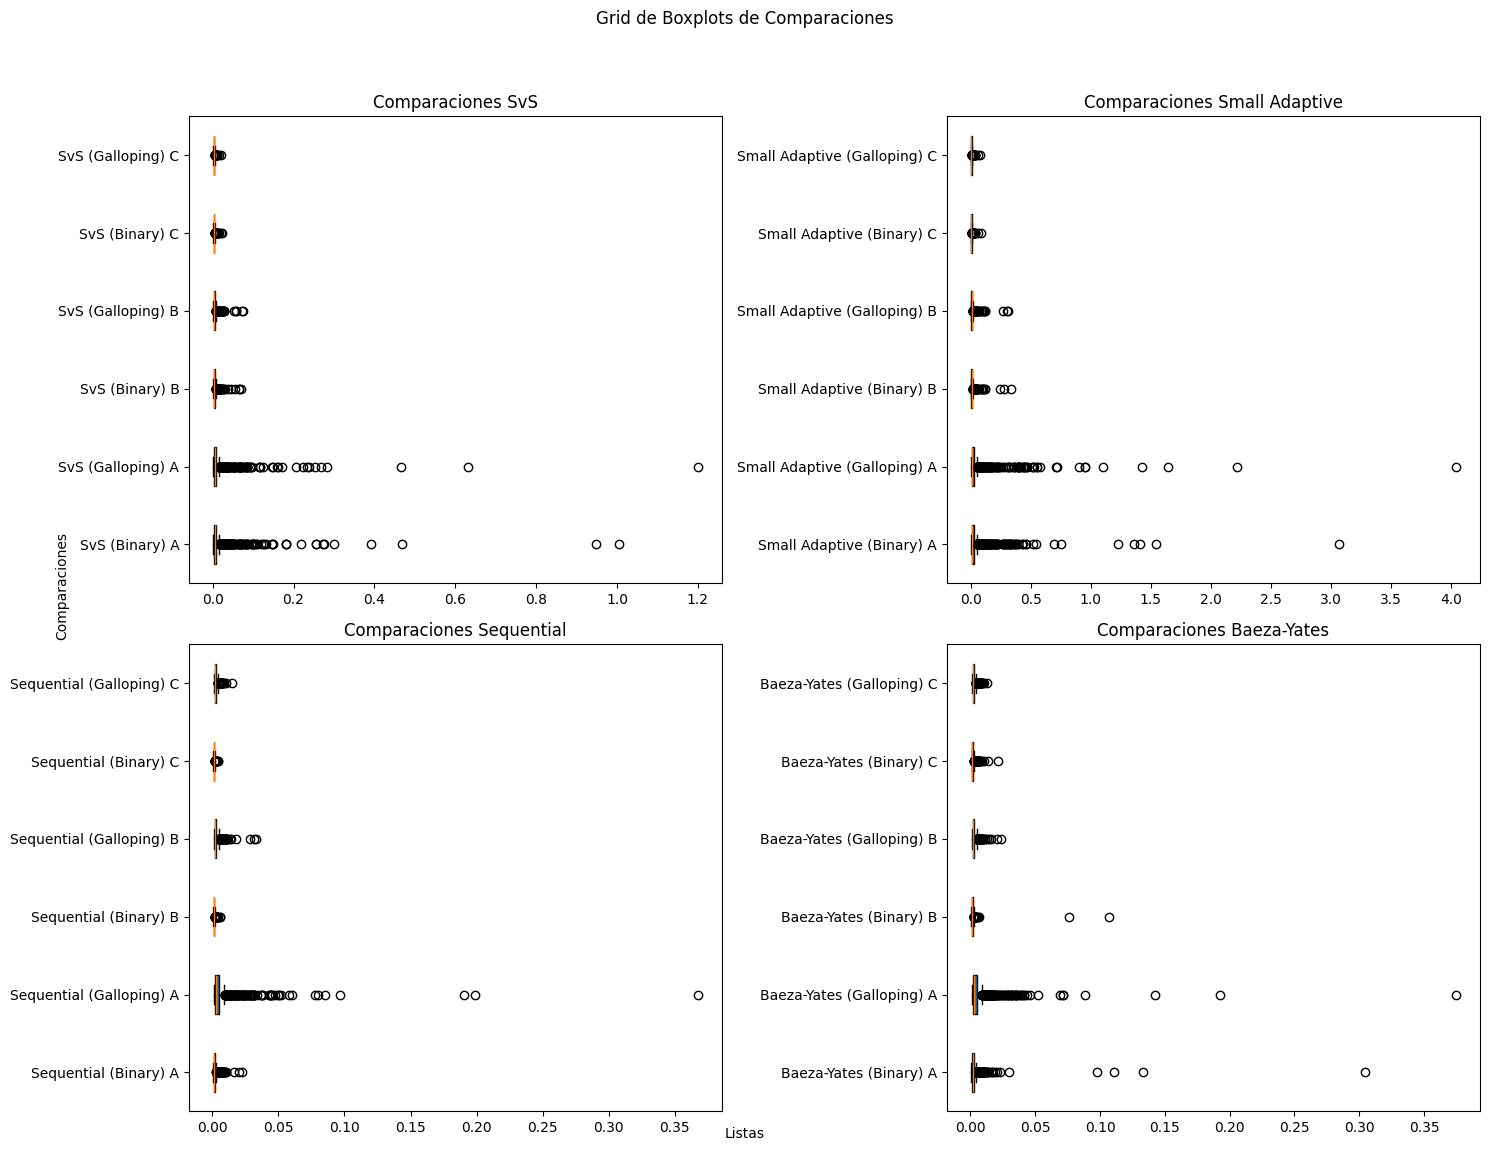

In [21]:
# Datos de comparaciones
comparaciones_svs = [comparaciones_svsb_A, comparaciones_svsg_A, comparaciones_svsb_B, comparaciones_svsg_B, comparaciones_svsb_C, comparaciones_svsg_C]
comparaciones_small_adaptive = [comparaciones_sab_A, comparaciones_sag_A, comparaciones_sab_B, comparaciones_sag_B, comparaciones_sab_C, comparaciones_sag_C]
comparaciones_sequential = [comparaciones_seqb_A, comparaciones_seqg_A, comparaciones_seqb_B, comparaciones_seqg_B, comparaciones_seqb_C, comparaciones_seqg_C]
comparaciones_baezayates = [comparaciones_bayb_A, comparaciones_bayg_A, comparaciones_bayb_B, comparaciones_bayg_B, comparaciones_bayb_C, comparaciones_bayg_C]

# Etiquetas para cada conjunto de datos
labels_svs = ['SvS (Binary) A', 'SvS (Galloping) A', 'SvS (Binary) B', 'SvS (Galloping) B', 'SvS (Binary) C', 'SvS (Galloping) C']
labels_small_adaptive = ['Small Adaptive (Binary) A', 'Small Adaptive (Galloping) A', 'Small Adaptive (Binary) B', 'Small Adaptive (Galloping) B', 'Small Adaptive (Binary) C', 'Small Adaptive (Galloping) C']
labels_sequential = ['Sequential (Binary) A', 'Sequential (Galloping) A', 'Sequential (Binary) B', 'Sequential (Galloping) B', 'Sequential (Binary) C', 'Sequential (Galloping) C']
labels_baezayates = ['Baeza-Yates (Binary) A', 'Baeza-Yates (Galloping) A', 'Baeza-Yates (Binary) B', 'Baeza-Yates (Galloping) B', 'Baeza-Yates (Binary) C', 'Baeza-Yates (Galloping) C']

# Crear el grid de subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Añadir boxplots a cada subplot
axs[0, 0].boxplot(comparaciones_svs, vert=False, patch_artist=True, labels=labels_svs, showfliers=True)
axs[0, 0].set_title('Comparaciones SvS')

axs[0, 1].boxplot(comparaciones_small_adaptive, vert=False, patch_artist=True, labels=labels_small_adaptive, showfliers=True)
axs[0, 1].set_title('Comparaciones Small Adaptive')

axs[1, 0].boxplot(comparaciones_sequential, vert=False, patch_artist=True, labels=labels_sequential, showfliers=True)
axs[1, 0].set_title('Comparaciones Sequential')

axs[1, 1].boxplot(comparaciones_baezayates, vert=False, patch_artist=True, labels=labels_baezayates, showfliers=True)
axs[1, 1].set_title('Comparaciones Baeza-Yates')

# Añadir etiquetas comunes
fig.suptitle('Grid de Boxplots de Comparaciones')
fig.text(0.5, 0.04, 'Listas', ha='center')
fig.text(0.04, 0.5, 'Comparaciones', va='center', rotation='vertical')

# Ajustar el layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrar el gráfico
plt.show()